In [6]:
import os
import shutil

In [7]:
import pickle

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
file_path = "/content/drive/MyDrive/approximated_time_series_matrix.pkl"

# Carica l'oggetto dal file .pkl
with open(file_path, 'rb') as file:
    X = pickle.load(file)

file_path2 = "/content/drive/MyDrive/dataframe.pkl"

# Carica l'oggetto dal file .pkl
with open(file_path2, 'rb') as file:
    df = pickle.load(file)


In [12]:
!pip install awkward

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.2/631.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.3 MB/s eta 0:00:00


In [13]:
import pandas as pd
import numpy as np
import pathlib
from tqdm.notebook import tqdm
import librosa
import awkward as ak
import matplotlib.pyplot as plt
from IPython.display import Audio
from collections import defaultdict
from scipy.signal import decimate

dataset_folder = pathlib.Path("/content/drive/MyDrive/AUDIO")  # change it with your file location

file_list = list(dataset_folder.iterdir())
for i, path in enumerate(file_list):
    if path.suffix != ".wav":
        file_list.pop(i)
file_list = sorted(file_list)
file_list

[PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-01.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-02.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-03.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-04.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-05.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-06.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-07.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-08.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-09.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-10.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-11.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-12.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-13.wav'),
 PosixPath('/content/drive/MyDrive/AUDIO/03-01-01-01-01-01-14.wav'),
 PosixPath('/content/drive/MyDrive

In [8]:
array = list()
for path in tqdm(file_list):
    librosa_audio_segment, sr = librosa.load(path, sr=None)
    array.append([librosa_audio_segment])

  0%|          | 0/2494 [00:00<?, ?it/s]

In [9]:
b = ak.ArrayBuilder()
for path in tqdm(file_list):
    librosa_audio_segment, sr = librosa.load(path, sr=None)
    b.begin_list()
    b.begin_list()
    for value in librosa_audio_segment:
        b.real(value)
    b.end_list()
    b.end_list()
array = b.snapshot()

  0%|          | 0/2494 [00:00<?, ?it/s]

In [10]:
import pandas as pd
import os

df = pd.DataFrame()
file_names = []

for path in file_list:
    stem = os.path.splitext(os.path.basename(path))[0].split("-")
    file_names.append(os.path.basename(path))
    df = df.append(pd.Series(stem), ignore_index=True)

CATEGORICAL_FEATURES_NAMES = {
    "modality": {"01": "full-AV", "02": "video-only", "03": "audio-only"},
    "vocal_channel": {"01": "speech", "02": "song"},
    "emotion": {"01" : "neutral", "02" : "calm", "03" : "happy", "04" : "sad", "05" : "angry", "06" : "fearful", "07" : "disgust", "08" : "surprised"},
    "emotional_intensity": {"01" : "normal", "02" : "strong"},
    "statement": {"01" : "Kids are talking by the door", "02" : "Dogs are sitting by the door"},
    "repetition": {"01" : "1st", "02" : "2nd"},
    "actor": {str(i).zfill(2): str(i).zfill(2) for i in range(1, 25)}
}
df.columns = list(CATEGORICAL_FEATURES_NAMES.keys())
for column in df.columns:
    df = df.replace(CATEGORICAL_FEATURES_NAMES)

for indice, valore in enumerate(df["actor"]):
    if valore == "07 (1)":
        df["actor"][indice] = "07"
    elif valore == "08 (1)":
        df["actor"][indice] = "08"
    elif valore == "06 (1)":
        df["actor"][indice] = "06"
    elif valore == "09 (1)":
        df["actor"][indice] = "09"
    elif valore == "10 (1)":
        df["actor"][indice] = "10"
    elif valore == "11 (1)":
        df["actor"][indice] = "11"
    elif valore == "12 (1)":
        df["actor"][indice] = "12"
    elif valore == "13 (1)":
        df["actor"][indice] = "13"
    elif valore == "14 (1)":
        df["actor"][indice] = "14"
    elif valore == "15 (1)":
        df["actor"][indice] = "15"
    elif valore == "16 (1)":
        df["actor"][indice] = "16"
    elif valore == "17 (1)":
        df["actor"][indice] = "17"
    elif valore == "18 (1)":
        df["actor"][indice] = "18"
    elif valore == "19 (1)":
        df["actor"][indice] = "19"
    elif valore == "20 (1)":
        df["actor"][indice] = "20"
    elif valore == "21 (1)":
        df["actor"][indice] = "21"
    elif valore == "22 (1)":
        df["actor"][indice] = "22"
    elif valore == "23 (1)":
        df["actor"][indice] = "23"
    elif valore == "24 (1)":
        df["actor"][indice] = "24"


df["sex"] = ["F" if i % 2 == 0 else "M" for i in df["actor"].astype(int)]
df["filename"] = file_names

<ipython-input-10-1c7d1d685144>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(stem), ignore_index=True)
<ipython-input-10-1c7d1d685144>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(stem), ignore_index=True)
<ipython-input-10-1c7d1d685144>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(stem), ignore_index=True)
<ipython-input-10-1c7d1d685144>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(stem), ignore_index=True)
<ipython-input-10-1c7d1d685144>:10: FutureWarning: The frame.append method is deprecated and will be removed fro

In [10]:
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,01,M,03-01-01-01-01-01-01.wav
1,audio-only,speech,neutral,normal,Kids are talking by the door,1st,02,F,03-01-01-01-01-01-02.wav
2,audio-only,speech,neutral,normal,Kids are talking by the door,1st,03,M,03-01-01-01-01-01-03.wav
3,audio-only,speech,neutral,normal,Kids are talking by the door,1st,04,F,03-01-01-01-01-01-04.wav
4,audio-only,speech,neutral,normal,Kids are talking by the door,1st,05,M,03-01-01-01-01-01-05.wav


In [11]:
df_sorted_actor = df.sort_values(by=["actor", "filename"])
idxs_sorted = list(df_sorted_actor.index)

idx_train = list(df_sorted_actor[df_sorted_actor.actor.astype(int) < 19].index)
idx_test = list(df_sorted_actor[df_sorted_actor.actor.astype(int) >= 19].index)

X_train = array[idx_train]
X_test = array[idx_test]
Y_train = df_sorted_actor[df_sorted_actor.actor.astype(int) < 19]
Y_test = df_sorted_actor[df_sorted_actor.actor.astype(int) >= 19]

In [11]:
df

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,01,M,03-01-01-01-01-01-01.wav
1,audio-only,speech,neutral,normal,Kids are talking by the door,1st,02,F,03-01-01-01-01-01-02.wav
2,audio-only,speech,neutral,normal,Kids are talking by the door,1st,03,M,03-01-01-01-01-01-03.wav
3,audio-only,speech,neutral,normal,Kids are talking by the door,1st,04,F,03-01-01-01-01-01-04.wav
4,audio-only,speech,neutral,normal,Kids are talking by the door,1st,05,M,03-01-01-01-01-01-05.wav
...,...,...,...,...,...,...,...,...,...
2489,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,20,F,03-02-06-02-02-02-20.wav
2490,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,21,M,03-02-06-02-02-02-21.wav
2491,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,22,F,03-02-06-02-02-02-22.wav
2492,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,23,M,03-02-06-02-02-02-23.wav


In [14]:
# record: vocal channel = speech; emotion = neutral;emotional_intensity = normal
#statement = kids are talking by the door; repetition = 1st; actor= 1;
path = "/content/03-01-01-01-01-01-01.wav"
ts, sr = librosa.load(path, sr=None)
print(ts.shape, sr)

(158558,) 48000


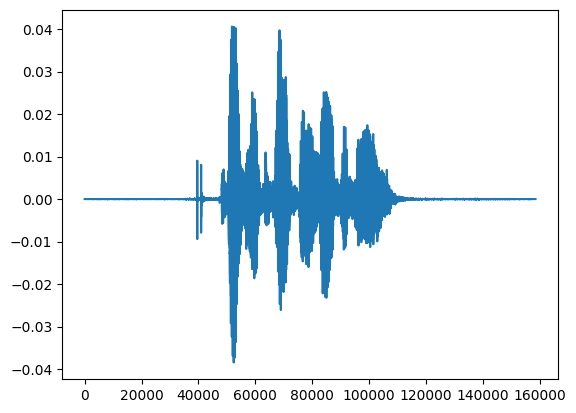

In [15]:
plt.plot(ts)
plt.show()

In [16]:
# downsample the audio
q = 8
TS1 = decimate(ts, q=24)

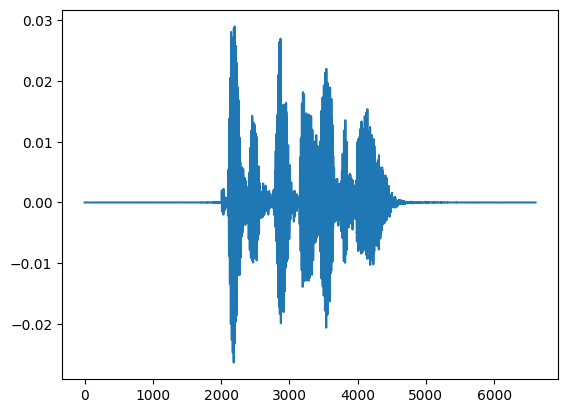

In [29]:
plt.plot(TS1)
plt.show()

In [30]:
# record: vocal channel = speech; emotion = neutral;emotional_intensity = normal
#statement = kids are talking by the door; repetition = 2st; actor= 1;
path = "/content/03-01-01-01-01-02-01.wav"
TS2, sr = librosa.load(path, sr=None)
print(ts.shape, sr)

(158558,) 48000


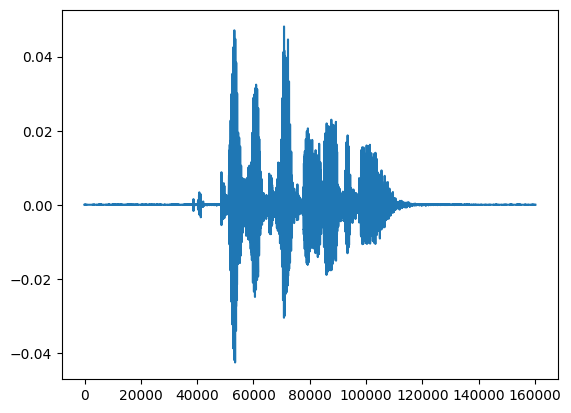

In [31]:
plt.plot(TS2)
plt.show()

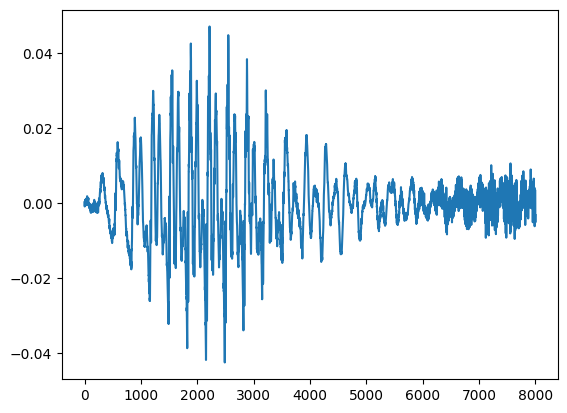

In [17]:
plt.plot(TS2[51000:59000])

In [32]:
# downsample the audio
q = 8
TS2 = decimate(TS2, q=24)

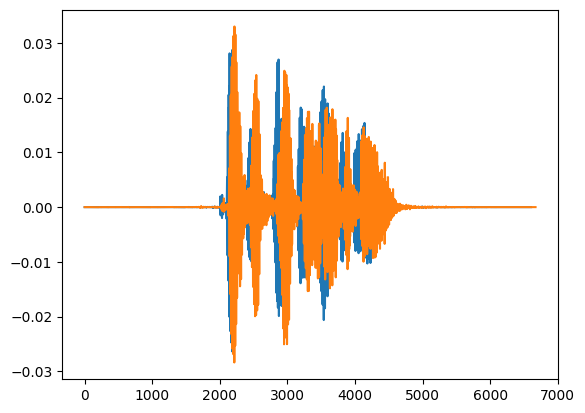

In [33]:
plt.plot(TS1)
plt.plot(TS2)
plt.show()

# TANSFORMATION

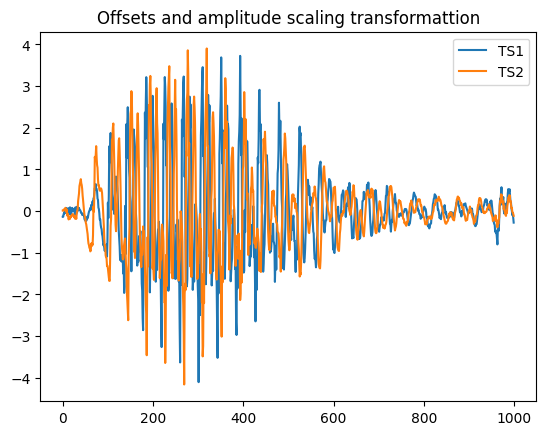

In [20]:
#Transformation I e II: Offset and Amplitude Scaling
plt.plot((TS1 - TS1.mean())/TS1.std(), label="TS1")
plt.plot((TS2 - TS2.mean())/TS2.std(), label ="TS2")
plt.legend()
plt.title('Offsets and amplitude scaling transformattion')
plt.show()

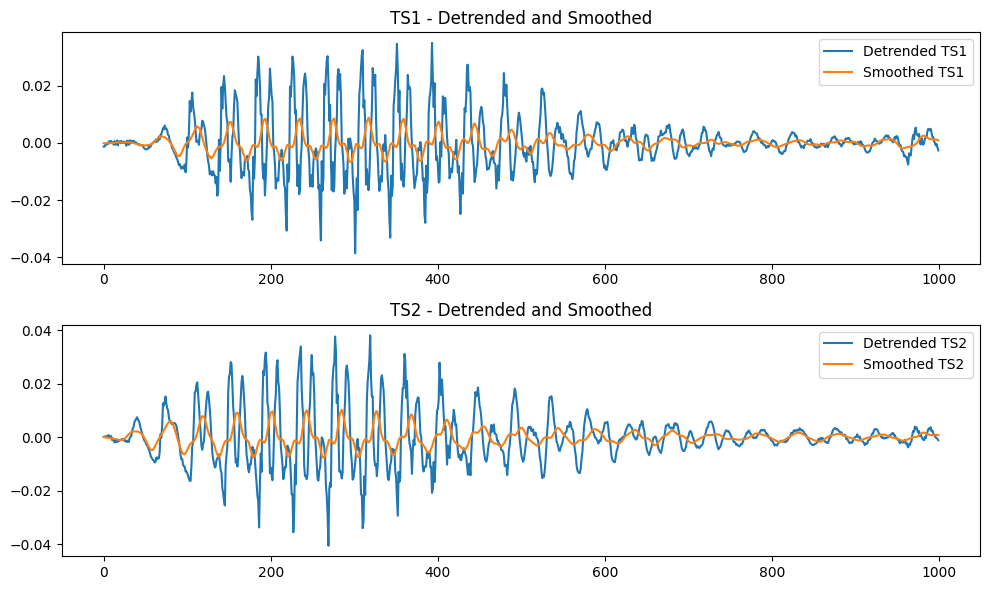

In [21]:
# Serie temporale 1 (ts1)
TS1 = np.array(TS1)

# Serie temporale 2 (ts2)
TS2 = np.array(TS2)

# Trend Removal
TS1_detrended = TS1 - np.mean(TS1)
TS2_detrended = TS2 - np.mean(TS2)

# Smoothing (Noise)
window_size = 24
TS1_smoothed = np.convolve(TS1_detrended.flatten(), np.ones(window_size)/window_size, mode='same')
TS2_smoothed = np.convolve(TS2_detrended.flatten(), np.ones(window_size)/window_size, mode='same')

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(TS1_detrended, label='Detrended TS1')
plt.plot(TS1_smoothed, label='Smoothed TS1')
plt.legend()
plt.title('TS1 - Detrended and Smoothed')

plt.subplot(2, 1, 2)
plt.plot(TS2_detrended, label='Detrended TS2')
plt.plot(TS2_smoothed, label='Smoothed TS2')
plt.legend()
plt.title('TS2 - Detrended and Smoothed')

plt.tight_layout()
plt.show()

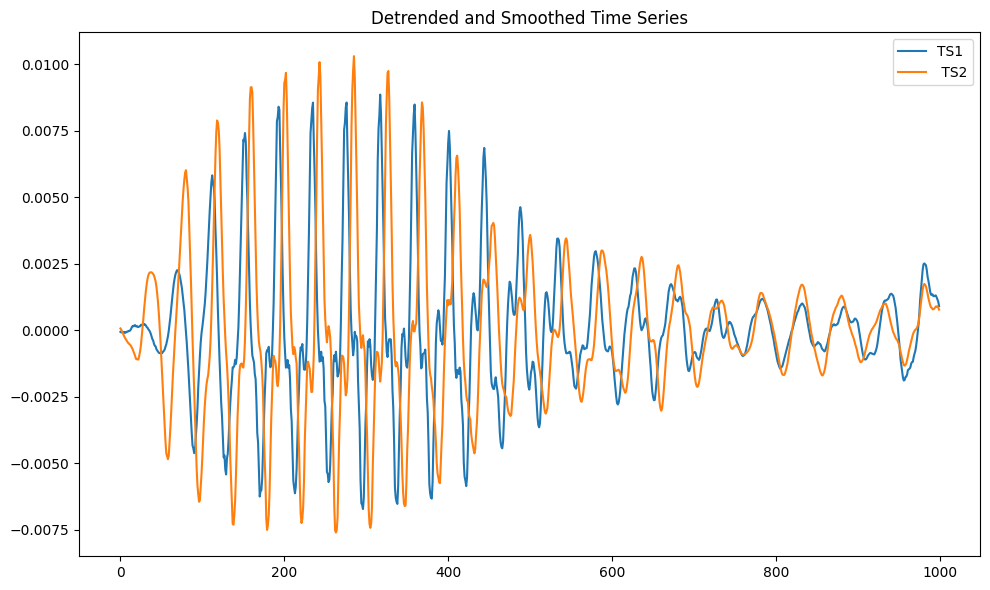

In [22]:
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(TS1_smoothed, label='TS1')
plt.plot(TS2_smoothed, label=' TS2')

plt.legend()
plt.title('Detrended and Smoothed Time Series')

plt.tight_layout()
plt.show()

In [23]:
TS1_detrended=pd.DataFrame(TS1_detrended)
TS2_detrended=pd.DataFrame(TS2_detrended)
TS1 = ((TS1_detrended - TS1_detrended.mean())/TS1_detrended.std()).rolling(window=24).mean().dropna()
TS2 = ((TS2_detrended - TS2_detrended.mean())/TS2_detrended.std()).rolling(window=24).mean().dropna()
TS1.shape, TS2.shape

((977, 1), (977, 1))

In [24]:
TS1=np.array(TS1)
TS2=np.array(TS2)

In [25]:
#euclidean distance
from scipy.spatial.distance import euclidean

TS1=TS1.ravel()
TS2=TS2.ravel()
dist = euclidean(TS1, TS2)
dist

12.231220049696367

In [26]:
#manhattan distance
from scipy.spatial.distance import cityblock

dist = cityblock(TS1, TS2)
dist

277.9778623221725

In [27]:
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 17.4 MB/s eta 0:00:00


In [28]:
#dyanmic time warping
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

dist = dtw(TS1, TS2)
dist

1.3720256177525123

In [29]:
path, dist = dtw_path(TS1[:15], TS2[:15])
path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (1, 13),
 (2, 14),
 (3, 14),
 (4, 14),
 (5, 14),
 (6, 14),
 (7, 14),
 (8, 14),
 (9, 14),
 (10, 14),
 (11, 14),
 (12, 14),
 (13, 14),
 (14, 14)]

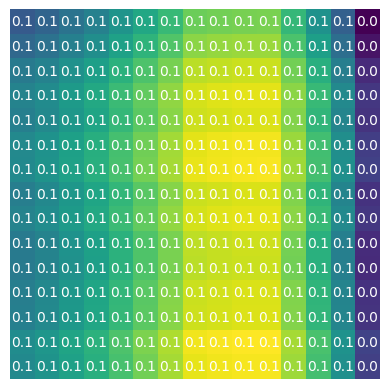

In [30]:
from scipy.spatial.distance import cdist

mat = cdist(TS1[:15].reshape(-1, 1), TS2[:15].reshape(-1, 1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

plt.show()

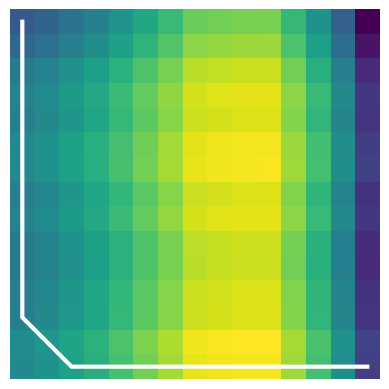

In [31]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([i for (i, j) in path], [j for (i, j) in path], "w-", linewidth=3.)
plt.show()

# TIME SERIES APPROXIMATION

In [18]:
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.6 MB/s eta 0:00:00


In [19]:
#DISCRETE FOURIER APPROXIMATION
from pyts.approximation import DiscreteFourierTransform

n_coefs = 500

dft = DiscreteFourierTransform(n_coefs=n_coefs)
TS1_dft = dft.fit_transform(TS1.reshape(1, -1))

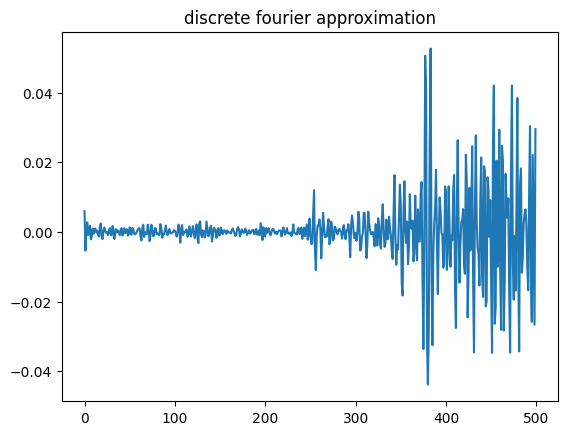

In [33]:
plt.plot(TS1_dft.ravel())
plt.title("discrete fourier approximation")
plt.show()

In [35]:
TS1_dft.shape

(1, 100)

In [36]:
# code derived from https://pyts.readthedocs.io/en/stable/auto_examples/approximation/plot_dft.html
def dft_inverse_trasform(X_dft, n_coefs, n_timestamps):
    # Compute the inverse transformation
    n_samples = X_dft.shape[0]
    if n_coefs % 2 == 0:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                            np.zeros((n_samples, ))]
        ]
    else:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs + 1, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
        ]
    X_irfft = np.fft.irfft(X_dft_new, n_timestamps)
    return X_irfft

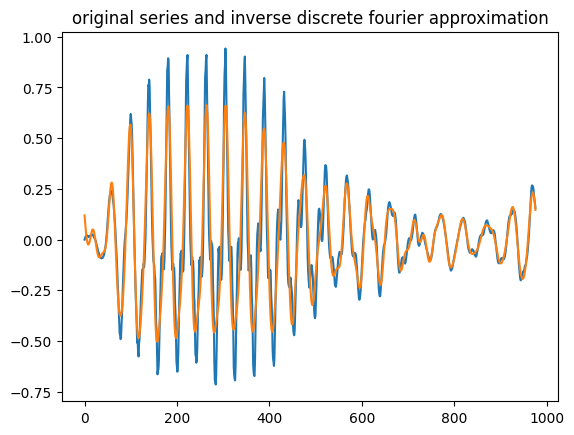

In [37]:
ts_dft_inv = dft_inverse_trasform(TS1_dft, n_coefs=n_coefs, n_timestamps=len(TS1))

plt.plot(TS1.ravel())
plt.plot((ts_dft_inv.ravel()))
plt.title("original series and inverse discrete fourier approximation")
plt.show()

In [38]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

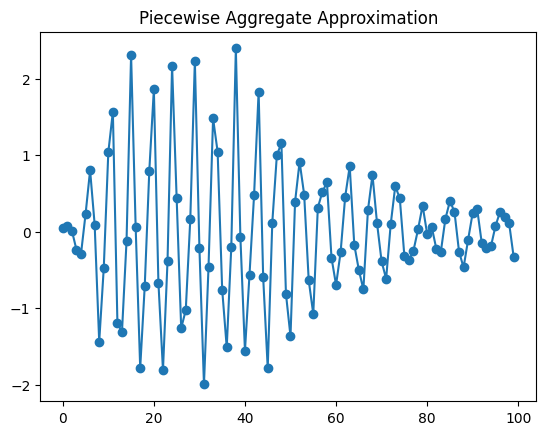

In [39]:
#PiecewiseAggregateApproximation
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(TS1.reshape(1,-1))

n_paa_segments = 100
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts)
paa_dataset_inv = paa.inverse_transform(ts_paa)

plt.plot(ts_paa.ravel(), marker='o')
plt.title("Piecewise Aggregate Approximation")
plt.show()

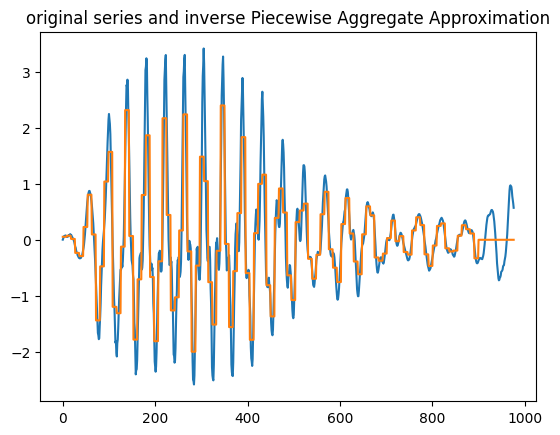

In [40]:
plt.plot(ts.ravel())
plt.plot(paa_dataset_inv.ravel())

plt.title("original series and inverse Piecewise Aggregate Approximation")
plt.show()

In [41]:
#SYMBOLIC AGGREGATE APPROXIMATION
n_sax_symbols = 100
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_dataset_inv = sax.inverse_transform(ts_sax)

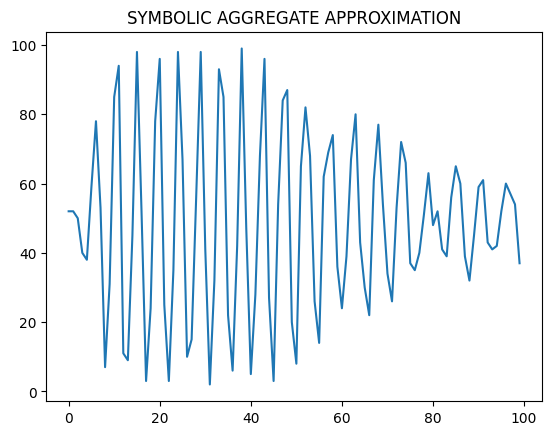

In [42]:
plt.plot(ts_sax.ravel())
plt.title("SYMBOLIC AGGREGATE APPROXIMATION")
plt.show()

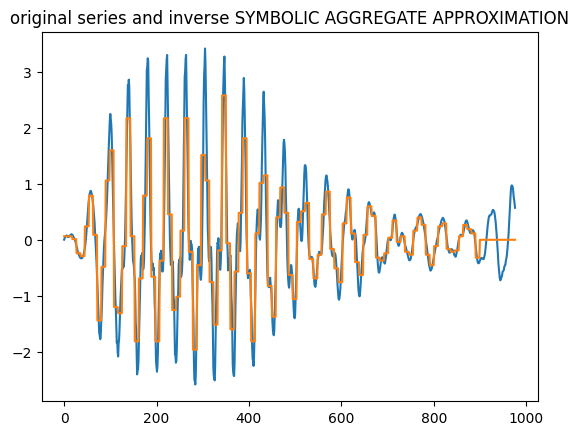

In [43]:
#plt.plot(ts.ravel())
plt.plot(ts.ravel())
plt.plot(sax_dataset_inv.ravel())
plt.title("original series and inverse SYMBOLIC AGGREGATE APPROXIMATION")
plt.show()

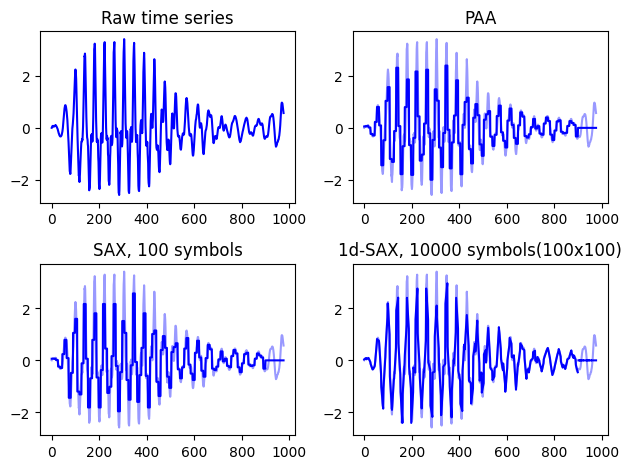

In [44]:
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 100
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# 1d-SAX transform
n_sax_symbols_avg = 100
n_sax_symbols_slope = 100
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_sax1d = one_d_sax.fit_transform(ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(ts_sax1d)

plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(ts[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

MATRIX PROFILE

In [3]:
!pip install matrixprofile-ts

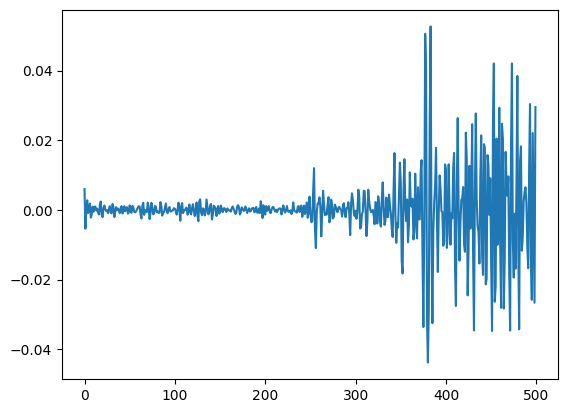

In [34]:
from matrixprofile import *

plt.plot(TS1_dft.ravel())
plt.show()

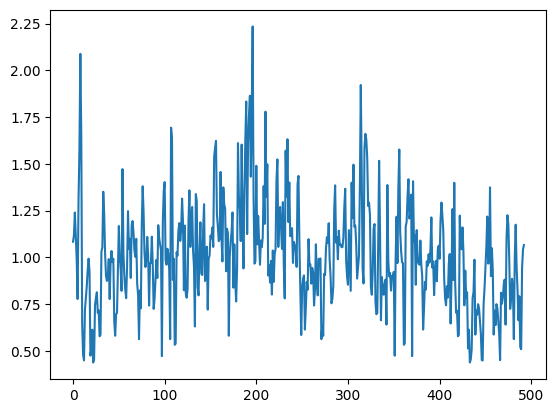

In [35]:
w =8
mp, mpi = matrixProfile.stomp(TS1_dft.ravel(), w)

plt.plot(mp)
plt.show()

In [2]:
!pip install stumpy

     ------------------------------------ 136.2/136.2 kB 535.8 kB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

# Generazione di una serie temporale di esempio
time_series = TS1_dft.ravel()

# Calcolo della Similarity Matrix
window_size = 50
similarity_matrix = np.zeros((len(time_series)-window_size+1, len(time_series)-window_size+1))

for i in range(len(time_series)-window_size+1):
    for j in range(len(time_series)-window_size+1):
        subsequence1 = time_series[i:i+window_size]
        subsequence2 = time_series[j:j+window_size]
        similarity_matrix[i, j] = euclidean(subsequence1, subsequence2)

# Identificazione dei motif
motif_indices = np.unravel_index(np.argmin(similarity_matrix), similarity_matrix.shape)

# Visualizzazione della serie temporale e dei motif
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Time Series')
plt.scatter(motif_indices[0], [time_series[i] for i in motif_indices[0]], color='r', label='Motif')
plt.legend()
plt.show()

NameError: name 'TS1_dft' is not defined

MOTIF DISCOVERY

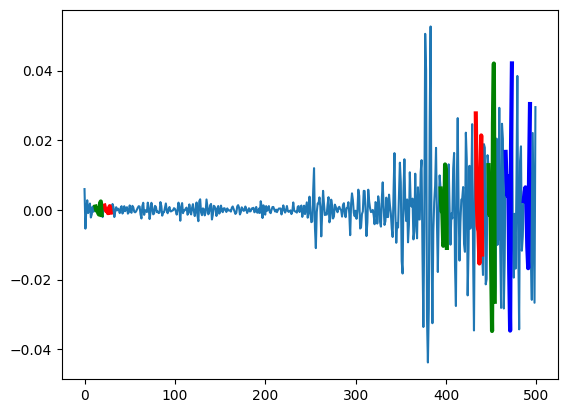

In [36]:
#MOTIF DISCOVERY
#TOP 3 MOTIF
#N1=RED; N2=GREEN; N3=BLUE
mo, mod  = motifs.motifs(TS1_dft.ravel(), (mp, mpi), max_motifs=3)

plt.plot(TS1_dft.ravel())
colors = ['r', 'g', 'b'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = TS1_dft.ravel()[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

ANOMALY DISCOVERY

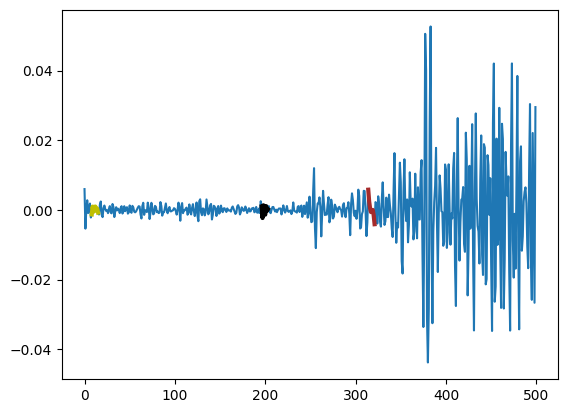

In [37]:
#ANOMALY DISCOVERY
#TOP 3 ANOMALY
#N1=NERO; N2=GIALLO; N3=MARRONE

from matrixprofile.discords import discords

anoms = discords(mp, ex_zone=3, k=3)

plt.plot(TS1_dft.ravel())
colors = ['k', 'y', "brown"][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = TS1_dft.ravel()[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

MOTIF DISCOVERY E ANOMALY DISCOVERY WITH DATASET

In [12]:
import glob
import librosa

# Cartella contenente i file WAV
folder_path = "/content/drive/MyDrive/AUDIO"

# Lista dei file WAV nella cartella
file_list = glob.glob(folder_path + '/*.wav')

# Caricamento dei file WAV e assegnazione alle variabili
for i, file_path in enumerate(file_list):
    # Generazione del nome della variabile
    var_name = 'ts{}'.format(i + 1)

    # Caricamento del file WAV
    locals()[var_name], sr = librosa.load(file_path, sr=None)

In [13]:
from scipy.signal import decimate

# Definisci il fattore di sottocampionamento
q = 24

# Crea una lista per contenere le serie temporali sottocampionate
decimated_time_series_list = []

# Sottocampiona ogni serie temporale utilizzando un ciclo for
for i in range(1, 2453):
    ts_name = 'ts{}'.format(i)
    ts = eval(ts_name)
    decimated_ts = decimate(ts[20000:140000], q=q)
    decimated_time_series_list.append(decimated_ts)

# Crea la matrice delle serie temporali sottocampionate
decimated_time_series_matrix = np.vstack(decimated_time_series_list)

# Stampa le dimensioni della matrice delle serie temporali sottocampionate
print(decimated_time_series_matrix.shape)

(2452, 5000)


In [14]:
!pip install pyts

In [18]:
from pyts.approximation import DiscreteFourierTransform
import numpy as np

# Definisci il numero di coefficienti per l'approssimazione
n_coefs = 500

# Crea una lista per contenere le serie temporali approssimate
approximated_time_series_list = []

# Approssima ogni serie temporale sottocampionata utilizzando un ciclo for
for i in range(1, 2453):
    ts_name = 'ts{}'.format(i)
    ts = eval(ts_name)

    # Crea un'istanza del modello DiscreteFourierTransform
    dft = DiscreteFourierTransform(n_coefs=n_coefs)

    # Adatta il modello ai dati di input
    dft.fit(ts.reshape(1, -1))

    # Approssima la serie temporale utilizzando la Discrete Fourier Approximation
    approximated_ts = dft.transform(ts.reshape(1, -1))


    approximated_time_series_list.append(approximated_ts)

# Crea la matrice delle serie temporali approssimate
approximated_time_series_matrix = np.vstack(approximated_time_series_list)

# Stampa le dimensioni della matrice delle serie temporali approssimate
print(approximated_time_series_matrix.shape)

(2452, 500)


In [19]:
X=approximated_time_series_matrix

In [26]:
with open('/content/drive/MyDrive/approximated_time_series_matrix.pkl', 'wb') as TSanalysis:
    pickle.dump(X, TSanalysis)

with open('/content/drive/MyDrive/dataframe.pkl', 'wb') as file:
    pickle.dump(df, file)

In [21]:
with open('approximated_time_series_matrix.pkl', 'wb') as TSanalysis:
    pickle.dump(X, TSanalysis)

with open('df_time_series.pkl', 'wb') as file:
    pickle.dump(X, file)

In [25]:
with open('dataframe.pkl', 'wb') as file:
    pickle.dump(df, file)

In [19]:
np.squeeze(X).shape

(2452, 1000)

In [20]:
!pip install tsfresh

Top 3 Motif:
Motif: 9, 1979, Distance: 0.0
Motif: 30, 43, Distance: 0.0
Motif: 60, 75, Distance: 0.0
Top 3 Anomalies:
Anomaly: 522, 577, Distance: 6445.2348680425275
Anomaly: 577, 583, Distance: 6367.362931378188
Anomaly: 510, 577, Distance: 6211.597455836559


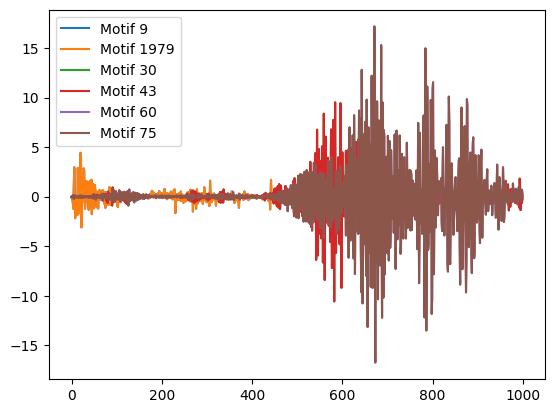

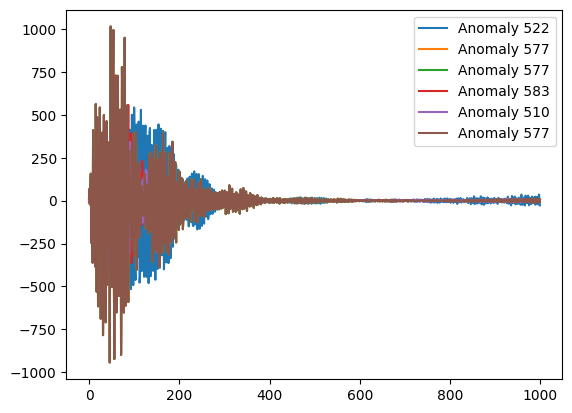

In [21]:
import numpy as np
from pyts.approximation import SymbolicAggregateApproximation


X_sax = X

# Trova i motif
motifs = []
soglia_motif = 0.1  # Soglia per rilevare i motivi

for i in range(len(X_sax)):
    for j in range(i + 1, len(X_sax)):
        distance = np.linalg.norm(X_sax[i] - X_sax[j])
        if distance < soglia_motif:
            motifs.append((i, j, distance))

# Stampa i top 3 motif
top_motifs = sorted(motifs, key=lambda x: x[2])[:3]
print("Top 3 Motif:")
for motif in top_motifs:
    print(f"Motif: {motif[0]}, {motif[1]}, Distance: {motif[2]}")

# Trova le anomalies
anomalies = []
soglia_anomalie = 0.5  # Soglia per rilevare le anomalie

for i in range(len(X_sax)):
    for j in range(i + 1, len(X_sax)):
        distance = np.linalg.norm(X_sax[i] - X_sax[j])
        if distance > soglia_anomalie:
            anomalies.append((i, j, distance))

# Stampa le top 3 anomalies
top_anomalies = sorted(anomalies, key=lambda x: x[2], reverse=True)[:3]
print("Top 3 Anomalies:")
for anomaly in top_anomalies:
    print(f"Anomaly: {anomaly[0]}, {anomaly[1]}, Distance: {anomaly[2]}")

# Visualizza i motif e le anomalies
fig, ax = plt.subplots()
for motif in top_motifs:
    ax.plot(range(len(X[motif[0]])), X[motif[0]], label=f"Motif {motif[0]}")
    ax.plot(range(len(X[motif[1]])), X[motif[1]], label=f"Motif {motif[1]}")
ax.legend()

fig, ax = plt.subplots()
for anomaly in top_anomalies:
    ax.plot(range(len(X[anomaly[0]])), X[anomaly[0]], label=f"Anomaly {anomaly[0]}")
    ax.plot(range(len(X[anomaly[1]])), X[anomaly[1]], label=f"Anomaly {anomaly[1]}")
ax.legend()

plt.show()

SHAPELETS DISCOVERY

In [39]:
y=df["vocal_channel"][:2452]

In [40]:
X.shape

(2452, 1000)

In [41]:
!pip install tslearn

In [42]:
%%time
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=100,
                        verbose=1)

shp_clf.fit(X, y)

from sklearn.metrics import accuracy_score

predicted_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, predicted_labels))

predicted_locations = shp_clf.locate(X)

/usr/local/lib/python3.10/dist-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/100
10/10 [==============================] - 7s 564ms/step - loss: 47439376.0000 - binary_accuracy: 0.5110 - binary_crossentropy: 47435564.0000
Epoch 2/100
10/10 [==============================] - 8s 735ms/step - loss: 20338108.0000 - binary_accuracy: 0.5200 - binary_crossentropy: 20336432.0000
Epoch 3/100
10/10 [==============================] - 5s 538ms/step - loss: 12604431.0000 - binary_accuracy: 0.5033 - binary_crossentropy: 12603481.0000
Epoch 4/100
10/10 [==============================] - 7s 741ms/step - loss: 8375424.5000 - binary_accuracy: 0.4980 - binary_crossentropy: 8374704.0000
Epoch 5/100
10/10 [==============================] - 7s 582ms/step - loss: 5434938.0000 - binary_accuracy: 0.5216 - binary_crossentropy: 5434467.0000
Epoch 6/100
10/10 [==============================] - 6s 609ms/step - loss: 4014380.2500 - binary_accuracy: 0.5281 - binary_crossentropy: 4014068.7500
Epoch 7/100
10/10 [==============================] - 7s 701ms/step - loss: 3257459.5000 - bina

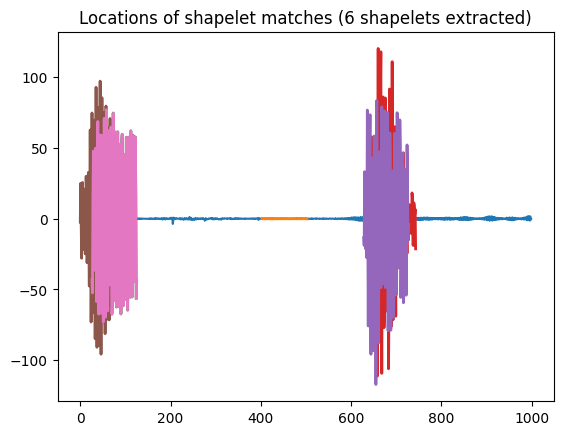

In [43]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Locations of shapelet matches "
          "({} shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

CLUSTERING

In [61]:
#SHAPE BASED CLUSTERING

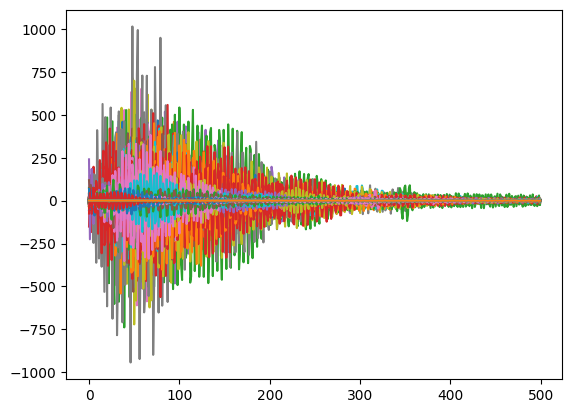

In [38]:
plt.plot(np.squeeze(X).T)
plt.show()

In [45]:
%%time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dati di input
# X Matrice delle serie temporali approssimate

# Valori di K da testare
k_values = range(2, 10)

# Calcola la silhouette score per ogni valore di K
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Trova il valore di K che massimizza la silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print("Numero ottimale di cluster: ", best_k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Numero ottimale di cluster:  2
CPU times: user 13.2 s, sys: 4.56 s, total: 17.8 s
Wall time: 11.9 s


In [ ]:
%%time
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, random_state=0)
km.fit(X)

In [ ]:
km.cluster_centers_.shape

In [ ]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [ ]:
km.inertia_

In [ ]:
#COMPRESSION BASED CLUSTERING
from sklearn.metrics import pairwise_distances
import zlib

In [ ]:
#431SECONDI / 7MINUTI
%%time
def cdm_dist(x, y):
    x_compressed = zlib.compress(x.tobytes())
    y_compressed = zlib.compress(y.tobytes())
    xy_compressed = zlib.compress(x.tobytes() + y.tobytes())

    return len(xy_compressed) / (len(x_compressed) + len(y_compressed))


M = pairwise_distances(X.reshape(X.shape[0], X.shape[1]), metric=cdm_dist)



In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Calcolo delle distanze tra le serie temporali
distances = M

# Valori di eps da testare
eps_values = np.linspace(0.1, 1.0, num=10)

# Lista per salvare le silhouette scores
silhouette_scores = []

# Esecuzione del DBSCAN per ogni valore di eps
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(distances)

    # Verifica se ci sono più di un cluster identificato
    if len(np.unique(labels)) > 1:
        # Calcolo della silhouette score
        score = silhouette_score(distances, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)  # Aggiungi valore 0 se viene identificato solo un cluster

# Plot della silhouette score rispetto ai valori di eps
plt.plot(eps_values, silhouette_scores, marker='o')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Eps')
plt.show()




In [71]:
dbscan = DBSCAN(eps=0.8, min_samples=5, metric='precomputed')
dbscan.fit(M)

DBSCAN(eps=0.8, metric='precomputed')

In [72]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


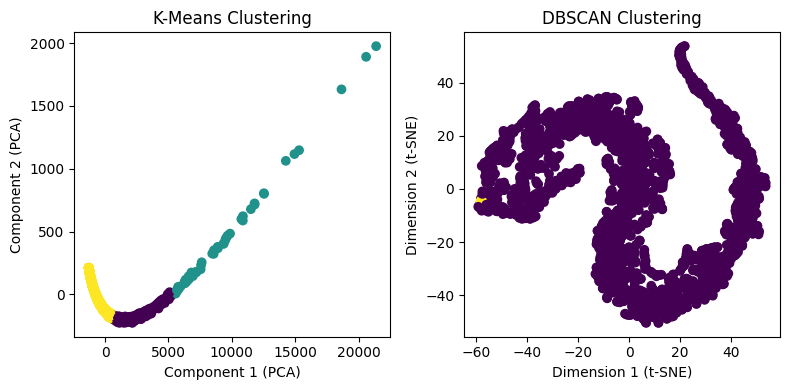

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import euclidean

# Generate or load your time series data
time_series = X

# Compute the pairwise distance matrix using an appropriate distance measure
distances = np.zeros((len(time_series), len(time_series)))
for i in range(len(time_series)):
    for j in range(i+1, len(time_series)):
        distances[i, j] = distances[j, i] = euclidean(time_series[i], time_series[j])

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(distances)

# Perform clustering using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')
dbscan_labels = dbscan.fit_predict(distances)

# Visualize the clusters using dimensionality reduction techniques
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

# Apply dimensionality reduction
pca_result = pca.fit_transform(distances)
tsne_result = tsne.fit_transform(distances)

# Plot the clusters using PCA
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels)
plt.xlabel('Component 1 (PCA)')
plt.ylabel('Component 2 (PCA)')
plt.title('K-Means Clustering')

# Plot the clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbscan_labels)
plt.xlabel('Dimension 1 (t-SNE)')
plt.ylabel('Dimension 2 (t-SNE)')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

CLASSIFICATION


In [74]:
#KNN TIME SERIES CLASSIFIER con distanza euclidea
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric="euclidean")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.501358695652174
F1-score [0.39137645 0.57767549]
              precision    recall  f1-score   support

        song       0.38      0.40      0.39       296
      speech       0.59      0.57      0.58       440

    accuracy                           0.50       736
   macro avg       0.48      0.48      0.48       736
weighted avg       0.50      0.50      0.50       736



In [75]:
#KNN TIME SERIES CLASSIFIER con distanza dtw
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric=dtw)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5747282608695652
F1-score [0.45941278 0.64949608]
              precision    recall  f1-score   support

        song       0.47      0.45      0.46       296
      speech       0.64      0.66      0.65       440

    accuracy                           0.57       736
   macro avg       0.56      0.55      0.55       736
weighted avg       0.57      0.57      0.57       736



In [76]:
#CNN TIME SERIES
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()

    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(GlobalAveragePooling1D())

    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  100
N. LABELS:  2


In [77]:
y_val_cnn

1625      song
2047      song
1424    speech
2007      song
1603      song
         ...  
1473      song
1285    speech
918     speech
1319    speech
1250    speech
Name: vocal_channel, Length: 344, dtype: object

In [78]:
y_train = np.array([1 if label == "speech" else 0 for label in y_train])

In [79]:
from sklearn.preprocessing import LabelEncoder
y_train_cnn = np.array([1 if label == "speech" else 0 for label in y_train_cnn])
y_val_cnn = np.array([1 if label == "speech" else 0 for label in y_val_cnn])
y_test = np.array([1 if label == "speech" else 0 for label in y_test])

In [80]:
y_val_cnn

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [81]:
#y_: speech=1, song=0
cnn = build_simple_cnn(n_timesteps, n_outputs)


X_train_cnn = X_train_cnn.astype('float64')
y_train_cnn = y_train_cnn.astype('float64')

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history



Epoch 1/5
86/86 [==============================] - 4s 19ms/step - loss: 0.6865 - accuracy: 0.5649 - val_loss: 0.6803 - val_accuracy: 0.5930 - lr: 0.0010
Epoch 2/5
86/86 [==============================] - 1s 14ms/step - loss: 0.6771 - accuracy: 0.5889 - val_loss: 0.6712 - val_accuracy: 0.6017 - lr: 0.0010
Epoch 3/5
86/86 [==============================] - 1s 14ms/step - loss: 0.6766 - accuracy: 0.5940 - val_loss: 0.6782 - val_accuracy: 0.5814 - lr: 0.0010
Epoch 4/5
86/86 [==============================] - 1s 14ms/step - loss: 0.6743 - accuracy: 0.5853 - val_loss: 0.6872 - val_accuracy: 0.5407 - lr: 0.0010
Epoch 5/5
86/86 [==============================] - 2s 21ms/step - loss: 0.6789 - accuracy: 0.5875 - val_loss: 0.6764 - val_accuracy: 0.5901 - lr: 0.0010


In [82]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

23/23 [==============================] - 0s 6ms/step
Accuracy 0.5842391304347826
F1-score [0.03164557 0.73529412]
              precision    recall  f1-score   support

           0       0.25      0.02      0.03       296
           1       0.59      0.97      0.74       440

    accuracy                           0.58       736
   macro avg       0.42      0.49      0.38       736
weighted avg       0.46      0.58      0.45       736



In [83]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [1]:
#SHAPELETS CLASSIFEIRS
# Brute Force Approach
from pyts.transformation import ShapeletTransform

In [2]:
# Learning-based Approach
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

NameError: ignored

In [86]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=100,
                        verbose=1)

shp_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/200
7/7 [==============================] - 1s 10ms/step - loss: 211.7091 - binary_accuracy: 0.5169 - binary_crossentropy: 211.6855
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 203.2744 - binary_accuracy: 0.5239 - binary_crossentropy: 203.2520
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 200.7323 - binary_accuracy: 0.5472 - binary_crossentropy: 200.7098
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 203.7294 - binary_accuracy: 0.5192 - binary_crossentropy: 203.7101
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 187.9745 - binary_accuracy: 0.5152 - binary_crossentropy: 187.9562
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 175.2671 - binary_accuracy: 0.5117 - binary_crossentropy: 175.2496
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 206.3433 - binary_accuracy: 0.4971 - binary_crossentropy: 206.3246
Epoch 8/200
7/7 [===========

LearningShapelets(max_iter=200, n_shapelets_per_size={10: 5}, verbose=1,
                  weight_regularizer=0.01)

In [87]:
y_pred = shp_clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

3/3 [==============================] - 0s 7ms/step
Accuracy 0.40217391304347827
F1-score [0.57364341 0.        ]
              precision    recall  f1-score   support

           0       0.40      1.00      0.57       296
           1       0.00      0.00      0.00       440

    accuracy                           0.40       736
   macro avg       0.20      0.50      0.29       736
weighted avg       0.16      0.40      0.23       736



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#Shaplet-distances-based Classifier
X_train2 = shp_clf.transform(X_train)
X_test2 = shp_clf.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

3/3 [==============================] - 0s 8ms/step
Accuracy 0.5720108695652174
F1-score [0.40227704 0.66666667]
              precision    recall  f1-score   support

           0       0.46      0.36      0.40       296
           1       0.62      0.72      0.67       440

    accuracy                           0.57       736
   macro avg       0.54      0.54      0.53       736
weighted avg       0.56      0.57      0.56       736



In [89]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5733695652173914
F1-score [0.32327586 0.68849206]
              precision    recall  f1-score   support

           0       0.45      0.25      0.32       296
           1       0.61      0.79      0.69       440

    accuracy                           0.57       736
   macro avg       0.53      0.52      0.51       736
weighted avg       0.54      0.57      0.54       736



In [94]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 12.9 MB/s eta 0:00:00


In [115]:
from sktime.classification.interval_based import CanonicalIntervalForest

clf = CanonicalIntervalForest(n_estimators=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.39      0.44       296
           1       0.65      0.75      0.70       440

    accuracy                           0.61       736
   macro avg       0.58      0.57      0.57       736
weighted avg       0.59      0.61      0.59       736

